In [2]:
#ACA LO HAGO EN UNIDADES NO COMOVILES

In [120]:
%pylab inline
import pynbody
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


In [109]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')
a=s0.properties['a']

In [110]:
gas0=s0.gas
pos0=gas0['pos']
ne0=gas0['ne']
u0=gas0['u']
rho0=gas0['rho']/a**3
rho0c=gas0['rho']


In [111]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250

r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)

In [113]:
#selecciono mi void
rv=7
cutv0, = np.where(r0<rv)

In [114]:
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mu0=(1.0-yHe)/(1+yHe+ne0)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
a=s0.properties['a']
te0=(5./3.-1.)*u0*vv*mu0*(mp/kcgs)
te0c=(5./3.-1.)*u0*vv*mu0*(mp/kcgs)*a**2

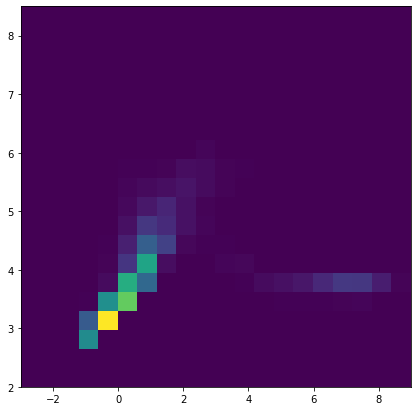

In [103]:
plt.figure(figsize=(7,7))
h=plt.hist2d(np.log10(rho0[cutv0]),np.log10(te0[cutv0]),density='true',bins=20,range=([-3,9],[2,8.5]))

In [104]:
r2=18
r1=12
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)

In [92]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t=pynbody.load(path+'snapshot_020')
a=t.properties['a']
gas=t.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho=gas['rho']/a**3
rhoc=gas['rho']

redshift=1./t.properties['a']-1

mu=(1.0-yHe)/(1+yHe+ne)
te=(5./3.-1.)*u*vv*mu*(mp/kcgs)
tec=(5./3.-1.)*u*vv*mu*(mp/kcgs)*a**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut, = np.where((r<r2) & (r>r1))

In [93]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t2=pynbody.load(path+'snapshot_035')
a=t2.properties['a']
gas=t2.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho2=gas['rho']/a**3
rho2c=gas['rho']
redshift=1./t3.properties['a']-1

mu=(1.0-yHe)/(1+yHe+ne)
te2=(5./3.-1.)*u*vv*mu*(mp/kcgs)
te2c=(5./3.-1.)*u*vv*mu*(mp/kcgs)*a**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut2, = np.where((r<r2) & (r>r1))

In [94]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
t3=pynbody.load(path+'snapshot_050')
a=t3.properties['a']
gas=t3.gas
pos=gas['pos']
u=gas['u']
ne=gas['ne']
rho3=gas['rho']/a**3
rho3c=gas['rho']
redshift=1./t3.properties['a']-1

mu=(1.0-yHe)/(1+yHe+ne)
te3=(5./3.-1.)*u*vv*mu*(mp/kcgs)
te3c=(5./3.-1.)*u*vv*mu*(mp/kcgs)*a**2
r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
cut3, = np.where((r<r2) & (r>r1))

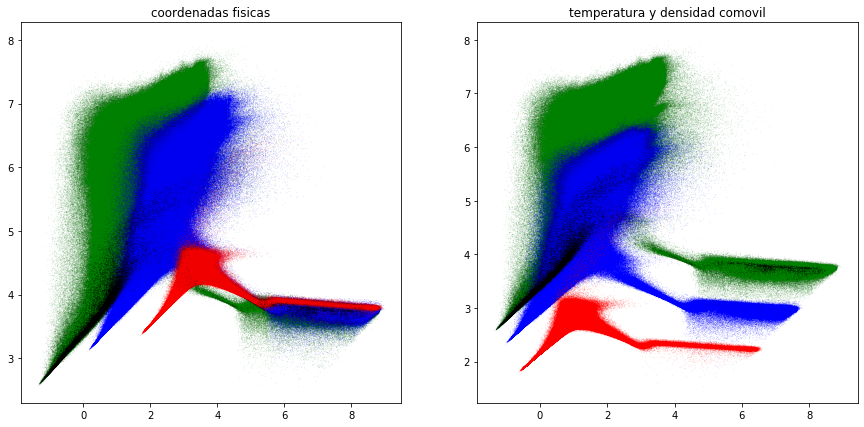

In [115]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.title('coordenadas fisicas')
plt.plot(np.log10(rho3[cut3]),np.log10(te3[cut3]),ls='none',marker='.',markersize=.05,color='green')
plt.plot(np.log10(rho2[cut2]),np.log10(te2[cut2]),ls='none',marker='.',markersize=.05,alpha=1,color='blue')
plt.plot(np.log10(rho[cut]),np.log10(te[cut]),ls='none',marker='.',markersize=.05,alpha=1,color='red')
plt.plot(np.log10(rho0[cutv0]),np.log10(te0[cutv0]),ls='none',marker='.',markersize=.1,color='black')

plt.subplot(122)
plt.title('temperatura y densidad comovil')
plt.plot(np.log10(rho3c[cut3]),np.log10(te3c[cut3]),ls='none',marker='.',markersize=.05,color='green')
plt.plot(np.log10(rho2c[cut2]),np.log10(te2c[cut2]),ls='none',marker='.',markersize=.05,alpha=1,color='blue')
plt.plot(np.log10(rhoc[cut]),np.log10(tec[cut]),ls='none',marker='.',markersize=.05,alpha=1,color='red')
plt.plot(np.log10(rho0c[cutv0]),np.log10(te0c[cutv0]),ls='none',marker='.',markersize=.1,color='black')


Text(0.5, 0, '$\\rho$')

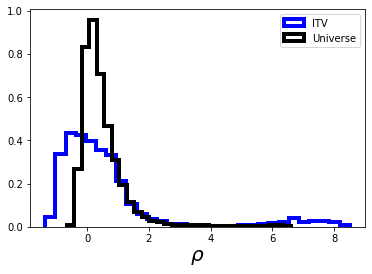

In [117]:
plt.figure(figsize=(6,4))
plt.hist(np.log10(rho0c[cutv0]),histtype='step',label='ITV',density='true',bins=30,lw=4,color='blue')
plt.hist(np.log10(rhoc[cut]),histtype='step',label='Universe',density='true',bins=30,lw=4,color='black')
plt.legend()
plt.xlabel(r"$\rho$",size=20)

In [121]:
ks=[]
pvalue=[]
z=[]
void=np.log10(rho0c[cutv0])
randvoid=np.random.choice(void,5000)
randvoid=np.sort(randvoid)
v2void=np.arange(len(randvoid))/float(len(randvoid))
for i in range(20,50):
    x=str(i)
    print(i)
    path='/mnt/is2/dpaz/ITV/S1373/out/'
    s=pynbody.load(path+'snapshot_0'+x)
    redshift=1./s.properties['a']-1
      
    gas=s.gas
    pos=gas['pos']
    rho=gas['rho']
    r=np.sqrt((pos[:,0]-xc)**2+(pos[:,1]-yc)**2+(pos[:,2]-zc)**2)
    cut, = np.where((r<r2) & (r>r1))
    
    univ=np.log10(rho[cut])
    randuniv=np.random.choice(univ,5000)
    randuniv=np.sort(randuniv)
    v2univ=np.arange(len(randuniv))/float(len(randuniv))
    v2univ_=np.interp(randuniv,randvoid,v2void)
    KS_TEST=sp.ks_2samp(v2univ_,v2void)
   
    z.append(redshift)
    ks.append(KS_TEST[0])
    pvalue.append(KS_TEST[1])

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


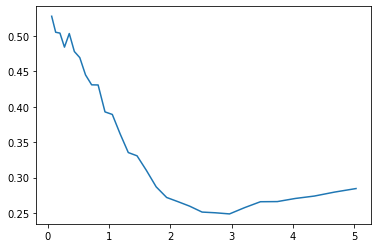

In [122]:
plt.plot(z,ks)

In [123]:
print('el maximo p value es',np.max(pvalue),'y como es menor que el nivel de significancia de alfa=0.05 se rechaza la H0')

el maximo p value es 2.987745583388267e-136 y como es menor que el nivel de significancia de alfa=0.05 se rechaza la H0


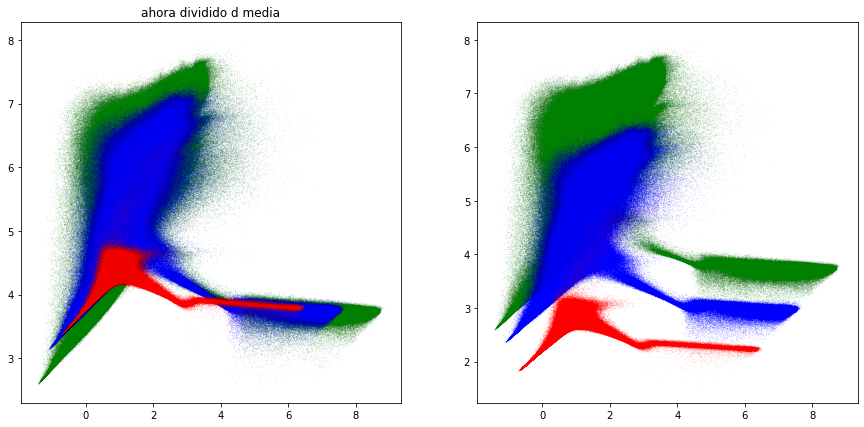

In [74]:
plt.figure(figsize=(15,7))

plt.subplot(121)
plt.title('ahora dividido d media')
plt.plot(np.log10(rho3[cut3]/dgs),np.log10(te3[cut3]),ls='none',marker='.',markersize=.05,color='green')
plt.plot(np.log10(rho2[cut2]/dgs),np.log10(te2[cut2]),ls='none',marker='.',markersize=.05,alpha=1,color='blue')
plt.plot(np.log10(rho[cut]/dgs),np.log10(te[cut]),ls='none',marker='.',markersize=.05,alpha=1,color='red')

plt.subplot(122)
plt.plot(np.log10(rho3[cut3]/dgs),np.log10(te3c[cut3]),ls='none',marker='.',markersize=.05,color='green')
plt.plot(np.log10(rho2[cut2]/dgs),np.log10(te2c[cut2]),ls='none',marker='.',markersize=.05,alpha=1,color='blue')
plt.plot(np.log10(rho[cut]/dgs),np.log10(tec[cut]),ls='none',marker='.',markersize=.05,alpha=1,color='red')

In [75]:
dgs

1.2491812393840622

In [79]:
np.max(np.log10(rho[cut]))

SimArray(6.6127634, dtype=float32, '1.00e+10 h**2 Msol a**-3 Mpc**-3')